<a href="https://colab.research.google.com/github/highway92/machine_learning/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C/%EB%8C%80%EC%B6%9C%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
loan_df = pd.read_csv("./loan_data_set.csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
print("\n ### 학습데이터 정보 ### \n")
# 필요없는 데이터를 제거하거나, 형태를 바꿔주기 위해 살펴보자..
print(loan_df.info())


 ### 학습데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


데이터 타입이 object 인것들이 참 많다. 손이 많이 갈것으로 예상된다

In [43]:
#Loan_ID 컬럼은 필요없는 것으로 판단하여 제거한다.
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
# 각 컬럼별 데이터 값을 확인해보자
for data in loan_df.columns.values:
  print(loan_df[data].unique())


['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP001

In [45]:
# 결정적인 feature에 nan값이 있을때 행 전체를 제거하고 싶은데
# 그런 행이 너무 많을 지도 모르니 확인을 먼저 해보자.

loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
# Loan_Status가 Y일 경우 1 N일 경우 0으로 바꿔분ㄷ
loan_df['Loan_Status'].replace(['Y','N'],[1,0],inplace=True)
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [47]:
# 숫자 값들의 nun 값은 평균값으로 대체 해준다.
def fill_mean(df, col_list):
  for col in col_list:
    df[col] = df[col].fillna(df[col].mean())
  return df

In [48]:
loan_df = fill_mean(loan_df, ['ApplicantIncome','CoapplicantIncome', 'LoanAmount'])
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


나머지 결측치에 대한 판단을 해주자
우선은 시각화를 해서 좀 보고싶다는 생각이 들었다.


In [49]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

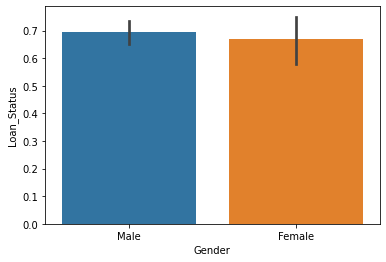

In [50]:
sns.barplot(x='Gender', y='Loan_Status', data=loan_df)

In [51]:
# married의 경우 3개 이므로 행을 지워준다.
loan_df.dropna(subset=['Married'],how='any',inplace=True)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            611 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          611 non-null    object 
 5   Self_Employed      579 non-null    object 
 6   ApplicantIncome    611 non-null    int64  
 7   CoapplicantIncome  611 non-null    float64
 8   LoanAmount         611 non-null    float64
 9   Loan_Amount_Term   597 non-null    float64
 10  Credit_History     561 non-null    float64
 11  Property_Area      611 non-null    object 
 12  Loan_Status        611 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 66.8+ KB


In [52]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
# Gender 또한 내가 임의로 설정할 수 없다는 판단에 결측치가 있을 경우 삭제한다.
loan_df.dropna(subset=['Gender'],how='any',inplace=True)
loan_df.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

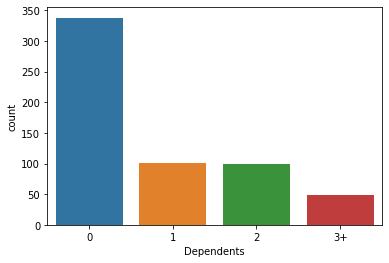

In [54]:
# dependents는 값의 분포를 살펴보자
sns.countplot(x='Dependents', data=loan_df)
# 가장 빈번한 값인 0으로 대체한다.(데이터수가 적기때문에 소중해)

In [57]:
loan_df['Dependents'] = loan_df['Dependents'].fillna(0)
loan_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

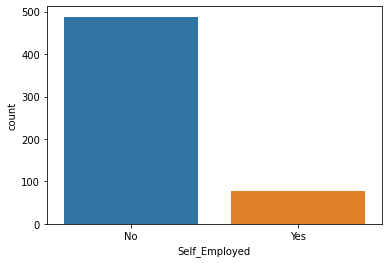

In [61]:
# self_Employed의 경우도 살펴보자
sns.countplot(x='Self_Employed', data=loan_df)
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna('No')


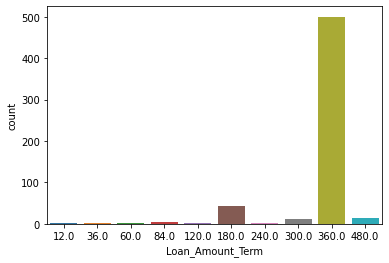

In [62]:
# Loan_Amount_Term
sns.countplot(x='Loan_Amount_Term', data=loan_df)
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(360.0)


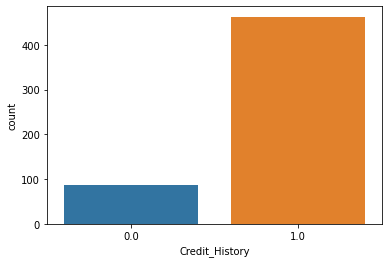

In [63]:
# Credit_History
sns.countplot(x='Credit_History', data=loan_df)
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(1.0)


In [64]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Nan 값에 대한 처리가 끝났다. 다시 한번 시각화하여 살펴보자.


In [65]:
# preprocessing
from sklearn import preprocessing

def encode_feature(df, col_list):
  for feature in col_list:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df
  

In [66]:
loan_df.info()
# object type에 대한 preprocessing을 진행해주자

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     598 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 85.4+ KB


In [67]:
loan_df.drop(['Loan_ID'], axis = 1, inplace=True)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         598 non-null    object 
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 80.7+ KB


In [71]:
loan_df = encode_feature(loan_df, ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
loan_df.info()
# 에러가 발생했다. Dependents는 object type 으로 0,1,2,3+ 값을 가지는데 여기서 에러가 발생한것 같다. 처리해주자

TypeError: ignored

In [72]:
loan_df['Dependents'].replace(['3+'],['3'],inplace=True)
loan_df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,1,1,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,0,0,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


In [74]:
loan_df = loan_df.astype({'Dependents':'int64'})
loan_df.info()
# 이제 다시 인코딩을 진행해보자.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    int64  
 2   Dependents         598 non-null    int64  
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 80.7+ KB


In [75]:
loan_df = encode_feature(loan_df, ['Education','Self_Employed','Property_Area'])

In [76]:
loan_df.info()
# 와 행복해졌다. 이제 시각화를 해보자 진짜로

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    int64  
 2   Dependents         598 non-null    int64  
 3   Education          598 non-null    int64  
 4   Self_Employed      598 non-null    int64  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    int64  
 11  Loan_Status        598 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 80.7 KB


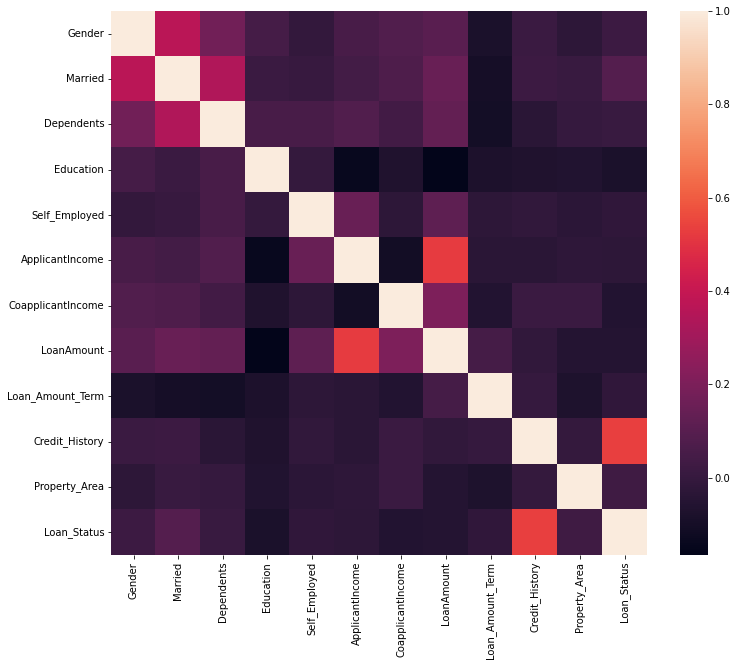

In [78]:
plt.figure(figsize=(12, 10))
sns.heatmap(loan_df.corr())

heatmap 상에서 봤을 경우 가장 상관관계가 높은 feature는 Credit_History와 Married인 것으로 보인다.


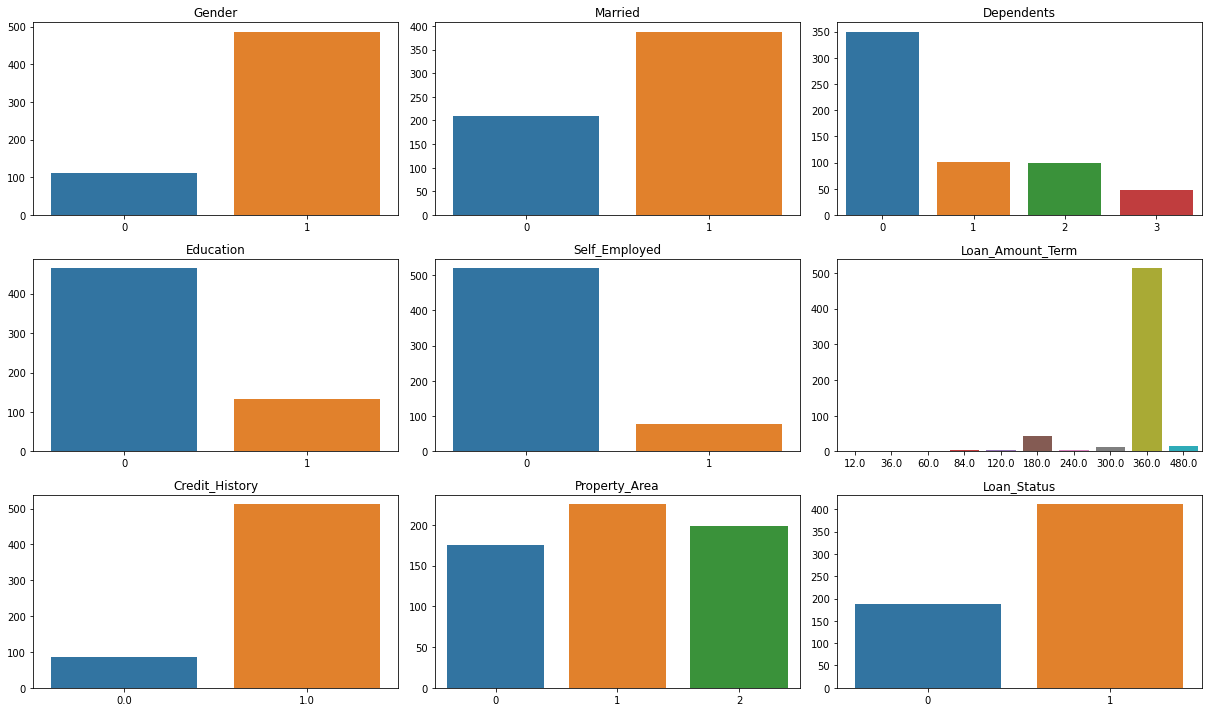

In [79]:
plt.figure(figsize = (17, 10))
index = 1
for col in loan_df.columns:
  if col not in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    graph = pd.value_counts(loan_df[col].values, sort=True)

    plt.subplot(3,3, index)
    plt.title(col)

    plt.tight_layout()
    sns.barplot(x=graph.index, y=graph)
    index += 1
  

이제 모델들을 사용해볼 차례다. 우선 train,test split부터 해주자!


In [87]:
from sklearn.model_selection import train_test_split
y_loan_df = loan_df['Loan_Status']
X_loan_df = loan_df.drop('Loan_Status', axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X_loan_df, y_loan_df,test_size=0.2, random_state=151)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [88]:
y_train.head()

380    1
613    0
422    1
529    1
64     0
Name: Loan_Status, dtype: int64

In [90]:
dt_clf = DecisionTreeClassifier(random_state=151)
rf_clf = RandomForestClassifier(random_state=151)
lr_clf = LogisticRegression()

dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTree 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('Randomforest 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))


DecisionTree 정확도 : 0.7083
Randomforest 정확도 : 0.8000
LogisticRegression 정확도 : 0.8083


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [93]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
  kfold = KFold(n_splits = folds)
  scores = []

  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_loan_df)):
    X_train,X_test = X_loan_df.values[train_index], X_loan_df.values[test_index]
    y_train,y_test = y_loan_df.values[train_index], y_loan_df.values[test_index]

    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count+1, accuracy))

  mean_score = np.mean(scores)
  print("평균 정확도 {0: .4f}".format(mean_score))


In [94]:
exec_kfold(dt_clf)

교차 검증 1 정확도 : 0.7250
교차 검증 2 정확도 : 0.6750
교차 검증 3 정확도 : 0.7500
교차 검증 4 정확도 : 0.7563
교차 검증 5 정확도 : 0.7563
평균 정확도  0.7325


In [95]:
exec_kfold(rf_clf)

교차 검증 1 정확도 : 0.7917
교차 검증 2 정확도 : 0.7333
교차 검증 3 정확도 : 0.7917
교차 검증 4 정확도 : 0.8487
교차 검증 5 정확도 : 0.8067
평균 정확도  0.7944


In [96]:
exec_kfold(lr_clf)

교차 검증 1 정확도 : 0.8083
교차 검증 2 정확도 : 0.7417
교차 검증 3 정확도 : 0.8083
교차 검증 4 정확도 : 0.8487
교차 검증 5 정확도 : 0.7899
평균 정확도  0.7994


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [97]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10], 'min_samples_split' : [2, 3, 5], 'min_samples_leaf' : [1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이터 파라미터 :', grid_dclf.best_params_)
print('GridSearchCv 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이터 파라미터 : {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCv 최고 정확도: 0.8075
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8083


In [98]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_rclf = GridSearchCV(rf_clf, param_grid = param_grid, scoring = 'accuracy', cv = 5)
grid_rclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이터 파라미터 :', grid_rclf.best_params_)
print('GridSearchCv 최고 정확도: {0:.4f}'.format(grid_rclf.best_score_))
best_rclf = grid_rclf.best_estimator_

dpredictions = best_rclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이터 파라미터 : {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
GridSearchCv 최고 정확도: 0.8096
테스트 세트에서의 RandomForestClassifier 정확도 : 0.8083
